# БИНАРНАЯ КЛАССИФИКАЦИЯ С ПОМОЩЬЮ ЛОГИСТИЧЕСКОЙ РЕГРЕССИИ НА ДАННЫХ BREAST CANCER

In [101]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler

# EDA

## Общая информация

In [102]:
print(load_breast_cancer()['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

## Описание признаков

In [103]:
X, y = load_breast_cancer(return_X_y=True, as_frame=True)

In [104]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

## Частота классов

In [105]:
y.value_counts()

target
1    357
0    212
Name: count, dtype: int64

## Объединим признаки и целевую переменную в один Dataframe

In [106]:
df = pd.concat([X, y], axis=1)

In [107]:
df.sample(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
40,13.44,21.58,86.18,563.0,0.08162,0.06031,0.03110,0.02031,0.1784,0.05587,...,30.25,102.50,787.9,0.10940,0.2043,0.20850,0.11120,0.2994,0.07146,0
432,20.18,19.54,133.80,1250.0,0.11330,0.14890,0.21330,0.12590,0.1724,0.06053,...,25.07,146.00,1479.0,0.16650,0.2942,0.53080,0.21730,0.3032,0.08075,0
123,14.50,10.89,94.28,640.7,0.11010,0.10990,0.08842,0.05778,0.1856,0.06402,...,15.98,102.80,745.5,0.13130,0.1788,0.25600,0.12210,0.2889,0.08006,1
312,12.76,13.37,82.29,504.1,0.08794,0.07948,0.04052,0.02548,0.1601,0.06140,...,16.40,92.04,618.8,0.11940,0.2208,0.17690,0.08411,0.2564,0.08253,1
288,11.26,19.96,73.72,394.1,0.08020,0.11810,0.09274,0.05588,0.2595,0.06233,...,22.33,78.27,437.6,0.10280,0.1843,0.15460,0.09314,0.2955,0.07009,1
540,11.54,14.44,74.65,402.9,0.09984,0.11200,0.06737,0.02594,0.1818,0.06782,...,19.68,78.78,457.8,0.13450,0.2118,0.17970,0.06918,0.2329,0.08134,1
392,15.49,19.97,102.40,744.7,0.11600,0.15620,0.18910,0.09113,0.1929,0.06744,...,29.41,142.10,1359.0,0.16810,0.3913,0.55530,0.21210,0.3187,0.10190,0
474,10.88,15.62,70.41,358.9,0.10070,0.10690,0.05115,0.01571,0.1861,0.06837,...,19.35,80.78,433.1,0.13320,0.3898,0.33650,0.07966,0.2581,0.10800,1
305,11.60,24.49,74.23,417.2,0.07474,0.05688,0.01974,0.01313,0.1935,0.05878,...,31.62,81.39,476.5,0.09545,0.1361,0.07239,0.04815,0.3244,0.06745,1
497,12.47,17.31,80.45,480.1,0.08928,0.07630,0.03609,0.02369,0.1526,0.06046,...,24.34,92.82,607.3,0.12760,0.2506,0.20280,0.10530,0.3035,0.07661,1


## Визуализация корреляции признаков

<Axes: >

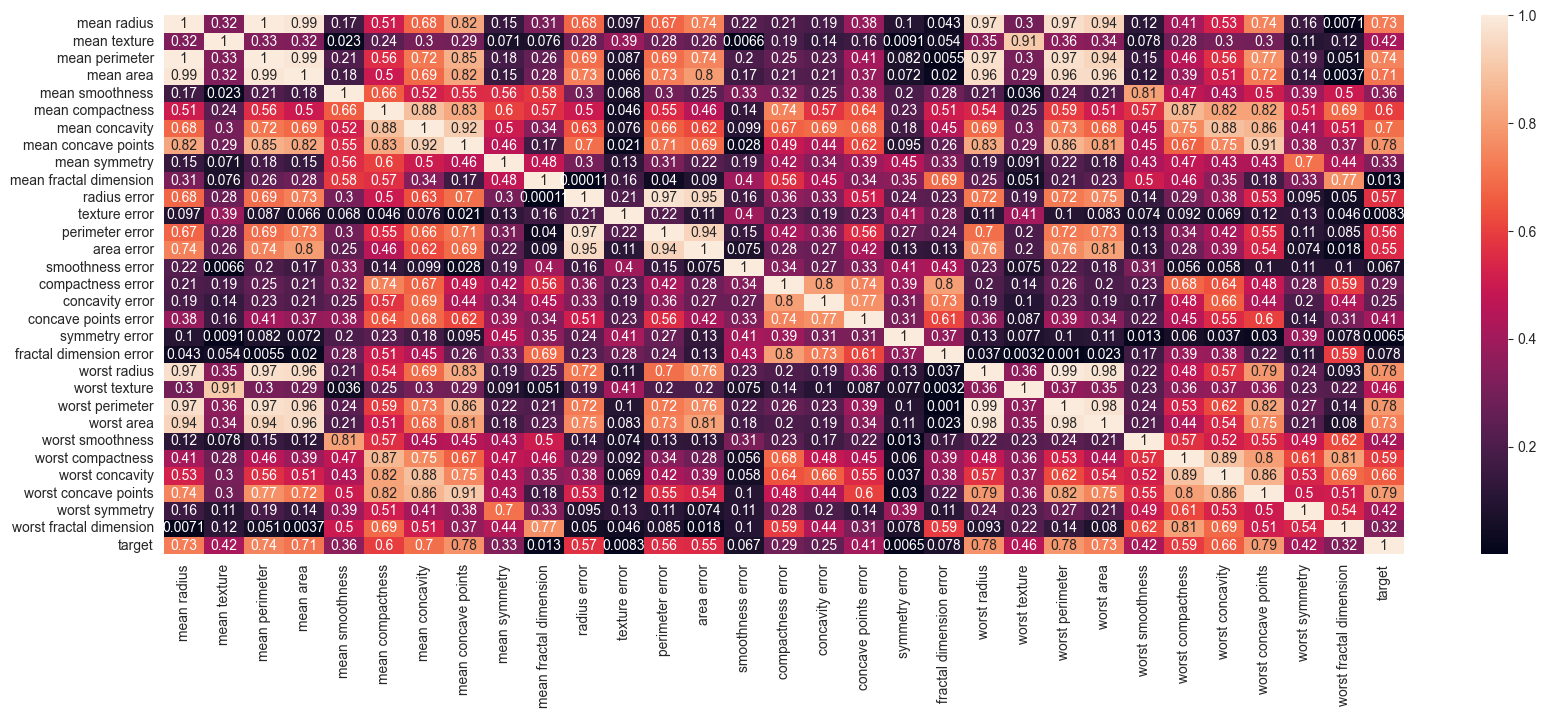

In [108]:
plt.figure(figsize=(20,7))
corr = df.corr().abs()
sns.heatmap(corr, annot=True)

Как видно на графике, для искомого признака (target) существует несколько признаков, которые имеют сильную корреляцию с ним. Это:
- worst concave points
- worst perimeter
- worst radius
- mean concave points
Для того, чтобы посмотреть возможность построения логистической модели, построим несколько графиков влияния комбинации этих признаков на искомый.

## Построение графиков зависимости признаков

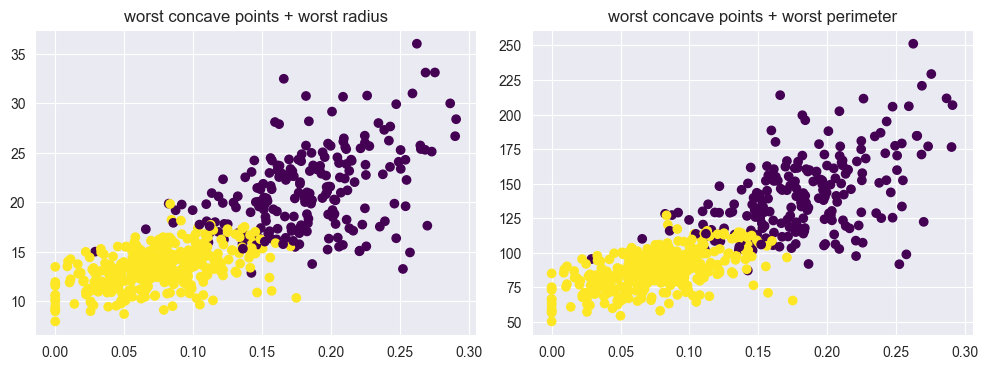

In [109]:
fig = plt.figure(figsize=(10,7))

ax1 = fig.add_subplot(221)
x1 = df['worst concave points']
y1 = df['worst radius']
ax1.scatter(x1, y1, c=df['target'], cmap='viridis')
ax1.set_title('worst concave points + worst radius')

ax2 = fig.add_subplot(222)
x2 = df['worst concave points']
y2 = df['worst perimeter']
ax2.scatter(x2, y2, c=df['target'], cmap='viridis')
ax2.set_title('worst concave points + worst perimeter')

plt.tight_layout()
plt.show()

Как видно из графиков, по этим признакам можно выделить два класса, что говорит о возможности построения модели логистической регрессии.

# Построим модель логистической регрессии

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [111]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [112]:
X_train.shape, X_test.shape

((455, 30), (114, 30))

In [113]:
model = LogisticRegression(max_iter=3000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=3000)

# Оценка модели

In [114]:
y_pred = model.predict(X_test)

In [115]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9736842105263158

In [116]:
f1 = f1_score(y_test, y_pred)
f1

0.9790209790209791

Модель получилась достаточно точной, что говорит о возможности использования ее для предсказания.